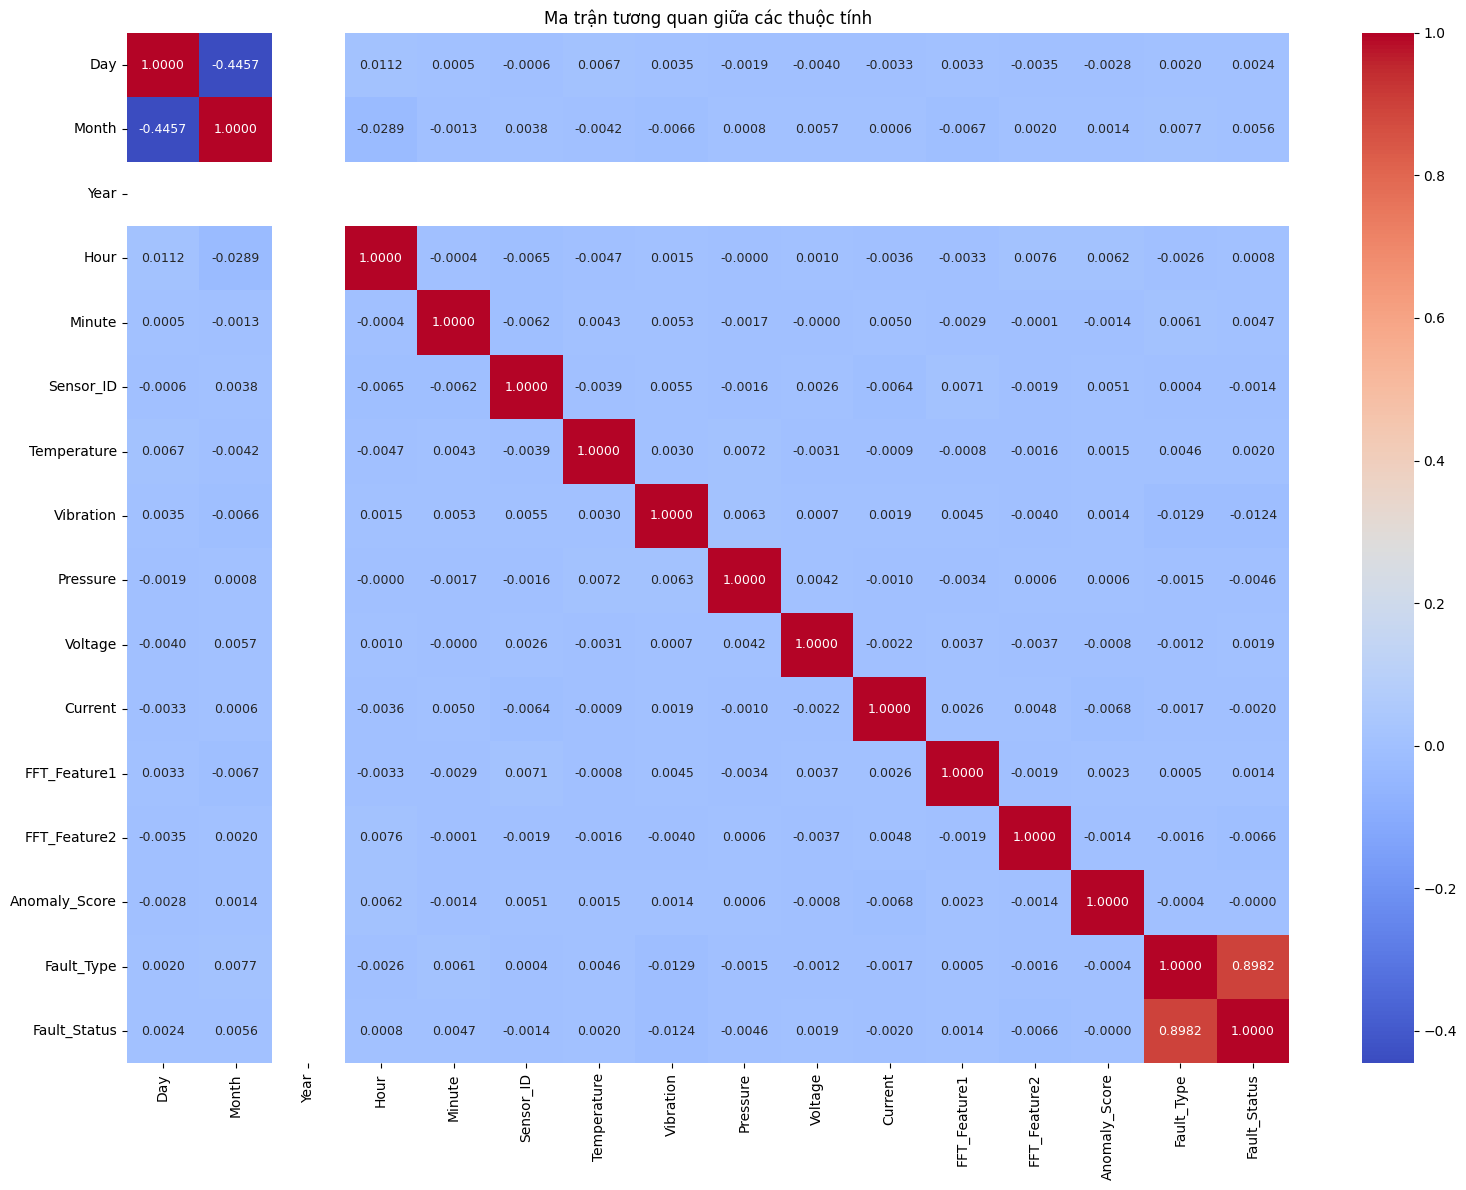

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Đọc dữ liệu
file_path = r'D:\dow\project_final\data\iot_equipment_monitoring_dataset.csv' 
df = pd.read_csv(file_path)

# 2. Xử lý cột thời gian
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute

# 3. Đưa Sensor_ID về số
if 'Sensor_ID' in df.columns:
    df['Sensor_ID'] = df['Sensor_ID'].astype(str).str.extract('(\d+)').astype(int)

# 4. Loại bỏ các cột chuẩn hóa (Normalized_)
normalized_cols = [col for col in df.columns if col.startswith('Normalize')]
df = df.drop(columns=normalized_cols)

# 5. Mã hóa trực tiếp cột Fault_Type (ghi đè chuỗi thành số)
if 'Fault_Type' in df.columns:
    df['Fault_Type'] = df['Fault_Type'].fillna('Normal')
    fault_type_mapping = {
        'Normal': 0,
        'Electrical Fault': 1,
        'Mechanical Failure': 2,
        'Overheating': 3
    }
    df['Fault_Type'] = df['Fault_Type'].map(fault_type_mapping)

# 6. Đưa các cột thời gian lên đầu
time_columns = ['Day', 'Month', 'Year', 'Hour', 'Minute']
other_columns = [col for col in df.columns if col not in (['Timestamp'] + time_columns)]
df = df[time_columns + other_columns]

# 7. Vẽ ma trận tương quan đầy đủ (các thuộc tính số)
plt.figure(figsize=(16, 12))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.4f', 
    cmap='coolwarm', 
    annot_kws={"size": 9}
)
plt.title('Ma trận tương quan giữa các thuộc tính')
plt.tight_layout()
plt.show()
